In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lesson 17: Comparing Distributions

## Mendel and Pea Flowers ##

In [2]:
# Mendel had 929 plants, of which 709 had purple flowers 
# Assign to `observed_purples` the proportion of purple flowers 
observed_purples = 709/929
observed_purples

0.7631862217438106

In [5]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.74811625,  0.25188375])

In [6]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [9]:
purple_flowers()

74.59634015069967

In [10]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

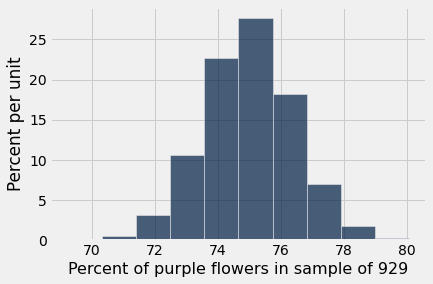

In [11]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [12]:
np.average(purples)

74.992572658772886

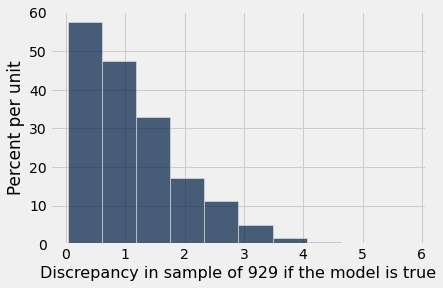

In [13]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [15]:
abs(observed_purples * 100 - 75)

1.318622174381062

**The original Lesson 17 starts here**

In [16]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [17]:
predicted_proportions = make_array(.75, .25)

In [18]:
sample_proportions(929, predicted_proportions)

array([ 0.76964478,  0.23035522])

In [19]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [20]:
purple_flowers()

76.21097954790098

In [21]:
purples = make_array()
trials = 10000

for i in np.arange(trials):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

In [22]:
purples

array([ 75.67276642,  77.71797632,  75.13455328, ...,  73.95048439,
        73.62755651,  71.68998924])

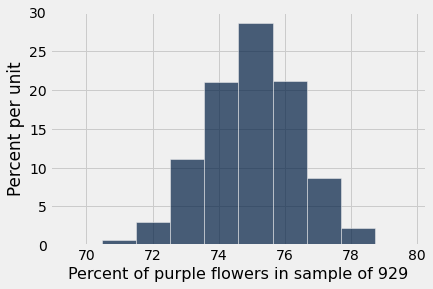

In [23]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

In [24]:
statistics = abs( purples - 75 )

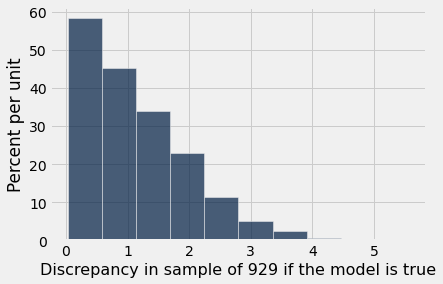

In [25]:
Table().with_column('Discrepancy in sample of 929 if the model is true', statistics).hist()

In [26]:
abs(observed_purples * 100 - 75)

1.318622174381062

## Alameda County Jury Panels ##

In [27]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


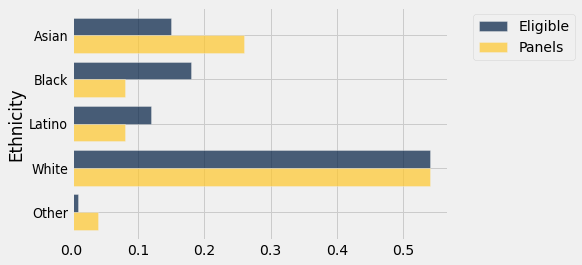

In [28]:
jury.barh('Ethnicity')

In [29]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [33]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([ 0.14546732,  0.15600843,  0.13562895,  0.55024596,  0.01264933])

In [34]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.145467
Black,0.18,0.08,0.156008
Latino,0.12,0.08,0.135629
White,0.54,0.54,0.550246
Other,0.01,0.04,0.0126493


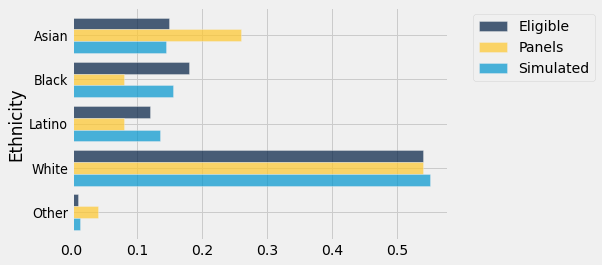

In [35]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [36]:
# In the last lecture, the difference between observed black/purple
# and their expected values (26%/75%) was our statistic.
#
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [37]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [44]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [56]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.016936050597329614

In [57]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

In [58]:
len(tvds)

10000

Observed TVD: 0.14


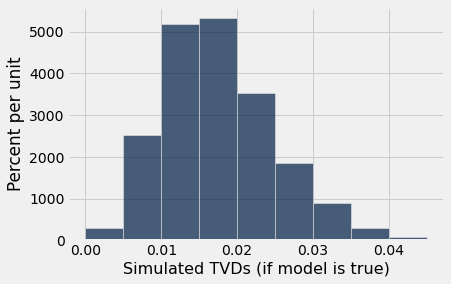

In [59]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

In [60]:
max(tvds)

0.056676036542515844

In [61]:
min(tvds)

0.00057624736472238619